In [1]:
!pip install opencv-python-headless ipywidgets ipywebrtc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.8 MB/s eta 0:00:00


In [2]:
import cv2
from google.colab.patches import cv2_imshow
from ipywebrtc import CameraStream
import numpy as np


camera = CameraStream()

In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();


      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);


      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


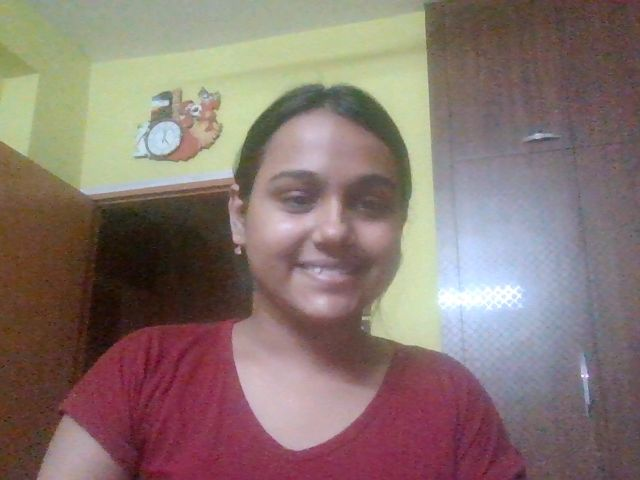

In [8]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))


  display(Image(filename))
except Exception as err:

  print(str(err))

In [9]:
!pip install torch torchvision torchaudio

from PIL import Image
import torch


model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

try:
    img = Image.open("photo.jpg")

    results = model(img)


    results.print()
except Exception as e:
    print(f"Error opening image: {e}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-15 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 480x640 1 person, 1 clock
Speed: 13.2ms pre-process, 620.2ms inference, 7.1ms NMS per image at shape (1, 3, 480, 640)


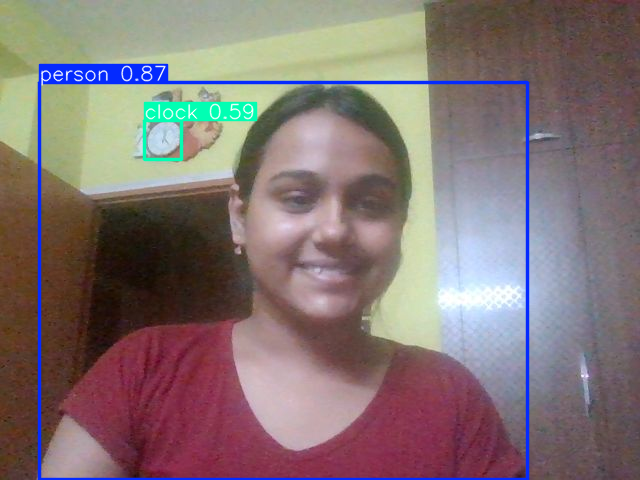

Saved 1 image to runs/detect/exp2


In [10]:
# Render results on image
results.show()

# Optionally, save the output image with bounding boxes
results.save('photo.jpg')

In [11]:
!pip install opencv-python fer

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━

  if event.key is 'enter':



Detected emotions: {'angry': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 0.93, 'sad': 0.0, 'surprise': 0.0, 'neutral': 0.06}
Dominant emotion: happy


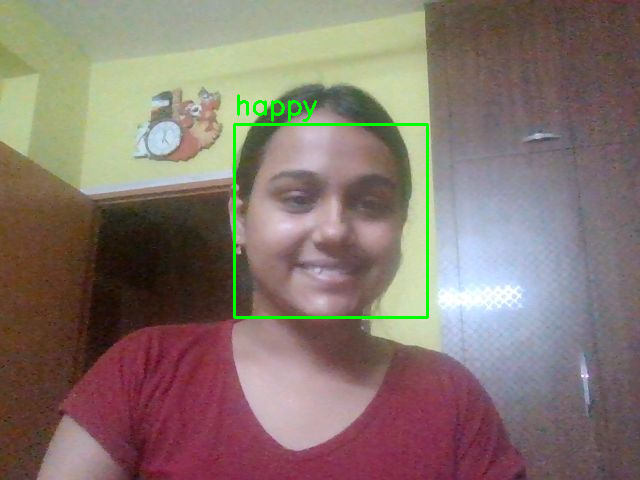

In [1]:
import cv2
from fer import FER
from google.colab.patches import cv2_imshow


image_path = "/content/photo.jpg"
image = cv2.imread(image_path)

emotion_detector = FER()


emotion_result = emotion_detector.detect_emotions(image)


if emotion_result:
    for face in emotion_result:
        emotions = face['emotions']
        dominant_emotion = max(emotions, key=emotions.get)
        print(f"Detected emotions: {emotions}")
        print(f"Dominant emotion: {dominant_emotion}")
else:
    print("No faces detected.")


for face in emotion_result:
    bounding_box = face["box"]
    emotions = face["emotions"]
    dominant_emotion = max(emotions, key=emotions.get)


    cv2.rectangle(image,
                  (bounding_box[0], bounding_box[1]),
                  (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                  (0, 255, 0), 2)


    cv2.putText(image, dominant_emotion,
                (bounding_box[0], bounding_box[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


cv2_imshow(image)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
from fer import FER
from google.colab.patches import cv2_imshow


ground_truth_emotions = ['angry', 'fear', 'happy', 'neutral','sad', 'surprise',
                         'angry', 'fear', 'happy', 'neutral','sad', 'surprise',
                         'angry', 'fear', 'happy', 'neutral','sad', 'surprise',
                         'angry', 'fear', 'happy', 'neutral','sad', 'surprise']


image_paths = [
    '/content/drive/MyDrive/emotion-archive/test_images/0/angry.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/0/fear.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/0/happy.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/0/neutral.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/0/sad.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/0/surprise.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/1/angry.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/1/fear.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/1/happy.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/1/neutral.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/1/sad.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/1/surprise.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/2/angry.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/2/fear.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/2/happy.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/2/neutral.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/2/sad.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/2/surprise.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/3/angry.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/3/fear.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/3/happy.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/3/neutral.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/3/sad.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/3/surprise.jpg',
]


emotion_detector = FER()


correct_predictions = 0
total_predictions = len(image_paths)


for idx, image_path in enumerate(image_paths):

    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Could not load image at {image_path}. Check the file path and permissions.")
        continue


    emotion_result = emotion_detector.detect_emotions(image)

    if emotion_result:
        for face in emotion_result:
            emotions = face['emotions']
            dominant_emotion = max(emotions, key=emotions.get)


            if dominant_emotion == ground_truth_emotions[idx]:
                correct_predictions += 1
            print(f"Ground truth: {ground_truth_emotions[idx]} | Detected: {dominant_emotion}")
    else:
        print(f"No faces detected in {image_path}")


accuracy = (correct_predictions / total_predictions) * 100
print(f"Accuracy: {accuracy:.2f}%")

Ground truth: angry | Detected: angry
Ground truth: fear | Detected: fear
Ground truth: happy | Detected: happy
Ground truth: neutral | Detected: neutral
Ground truth: sad | Detected: sad
Ground truth: surprise | Detected: surprise
Ground truth: angry | Detected: angry
Ground truth: fear | Detected: fear
Ground truth: happy | Detected: happy
Ground truth: neutral | Detected: neutral
Ground truth: sad | Detected: sad
Ground truth: surprise | Detected: surprise
Ground truth: angry | Detected: angry
Ground truth: fear | Detected: fear
Ground truth: happy | Detected: happy
Ground truth: neutral | Detected: neutral
Ground truth: sad | Detected: sad
Ground truth: surprise | Detected: surprise
Ground truth: angry | Detected: angry
Ground truth: fear | Detected: fear
Ground truth: happy | Detected: happy
Ground truth: happy | Detected: sad
Ground truth: neutral | Detected: neutral
Ground truth: sad | Detected: neutral
Ground truth: surprise | Detected: neutral
Accuracy: 91.67%


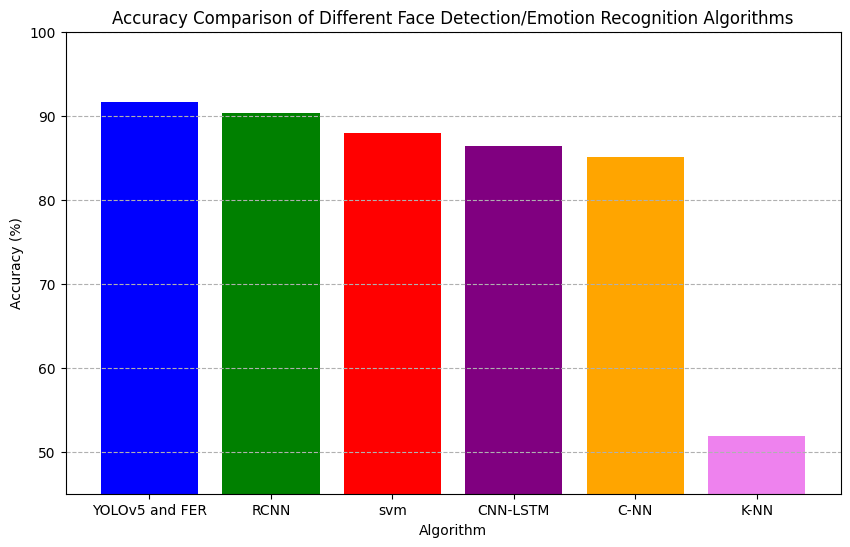

In [4]:
import matplotlib.pyplot as plt


algorithms = ['YOLOv5 and FER', 'RCNN','svm', 'CNN-LSTM','C-NN','K-NN' ]
accuracies = [91.65, 90.3, 87.9,86.42,85.1,51.82]


plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange','violet'])


plt.title('Accuracy Comparison of Different Face Detection/Emotion Recognition Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.ylim(45, 100)
plt.grid(True, axis='y', linestyle='--')


plt.show()

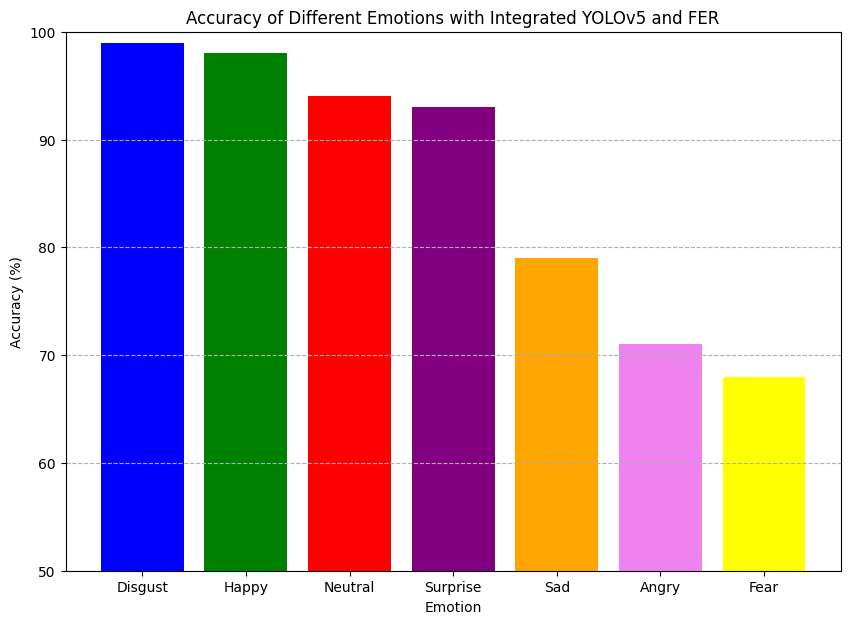

In [5]:
import matplotlib.pyplot as plt


algorithms = ['Disgust', 'Happy', 'Neutral', 'Surprise', 'Sad', 'Angry', 'Fear']
accuracies = [99, 98, 94, 93, 79, 71, 68]


plt.figure(figsize=(10, 7))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'violet','yellow'])


plt.title('Accuracy of Different Emotions with Integrated YOLOv5 and FER')
plt.xlabel('Emotion')
plt.ylabel('Accuracy (%)')
plt.ylim(50, 100)
plt.grid(True, axis='y', linestyle='--')


plt.show()